In [32]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, DateFormatter

In [2]:
net_rad = pd.read_csv('/Volumes/Seagate Backup Plus Drive/data_exp1/NetRad_30min.csv')
net_rad = net_rad[(net_rad['time'] >= '2020-12-29 15:30:00') & (net_rad['time'] <= '2021-03-31 23:50:00')]
net_rad = net_rad.reset_index()
net_rad.head()


,index,time,V3,V4,V5,V6,global,reflex,Lupper,Llower,Net_rn
0,0,2020-12-29 15:30:00,41.415000,7.747667,-43.366000,-9.518933,95.668650,20.221410,-64.181680,-14.088021,25.353581
1,1,2020-12-29 16:00:00,21.593000,3.831300,-54.655000,-11.026800,49.879830,9.999693,-80.889400,-16.319664,-24.689599
2,2,2020-12-29 16:30:00,2.967267,0.577033,-33.313333,-9.599333,6.854386,1.506057,-49.303733,-14.207013,-29.748391
3,3,2020-12-29 17:00:00,0.000000,0.000000,-22.724667,-8.870033,0.000000,0.000000,-33.632507,-13.127649,-20.504857
4,4,2020-12-29 17:30:00,0.000000,0.000000,-25.948667,-8.846333,0.000000,0.000000,-38.404027,-13.092573,-25.311453


In [3]:
net_rad.tail()

,index,time,V3,V4,V5,V6,global,reflex,Lupper,Llower,Net_rn
4428,4428,2021-03-31 21:30:00,0.0,0.0,-51.482667,-21.193333,0.0,0.0,-76.194347,-31.366133,-44.828213
4429,4429,2021-03-31 22:00:00,0.0,0.0,-49.026000,-20.759333,0.0,0.0,-72.558480,-30.723813,-41.834667
4430,4430,2021-03-31 22:30:00,0.0,0.0,-46.764000,-18.420333,0.0,0.0,-69.210720,-27.262093,-41.948627
4431,4431,2021-03-31 23:00:00,0.0,0.0,-45.371667,-17.657667,0.0,0.0,-67.150067,-26.133347,-41.016720
4432,4432,2021-03-31 23:30:00,0.0,0.0,-44.252000,-16.788333,0.0,0.0,-65.492960,-24.846733,-40.646227


In [4]:
synop = pd.read_excel('/Users/varungandhi/Downloads/Budapest-44527-10-perces.xlsx')
synop = synop.rename(columns = {'idő (CET)':'Time (CET)'})
synop = synop[(synop['Time (CET)'] >= '2020-12-29 15:30:00') & (synop['Time (CET)'] <= '2021-03-31 23:50:00')]
synop = synop.reset_index()
synop['Time (CET)'] = pd.to_datetime(synop['Time (CET)'])
synop = synop.resample('30min', on = 'Time (CET)', closed = 'left').mean()

In [5]:
net_rad.shape

(4433, 11)

In [6]:
type(net_rad['time'])

pandas.core.series.Series

In [7]:
  


times = pd.date_range("2020-12-29 13:30:00","2021-03-31 21:30:00", freq= '30T')
times.shape

(4433,)

In [8]:
net_rad['time_utc'] = times

In [9]:


synop = synop.reset_index()
synop = synop.iloc[6:, :]
synop = synop.reset_index()

In [10]:
combined_rad = pd.concat([net_rad, synop], axis = 1)
combined_rad = combined_rad.set_index(combined_rad['time_utc'])
combined_rad['Rn_lw'] = combined_rad['Lupper']- combined_rad['Llower']
#combined_rad['utctime'] = times 

In [11]:
def visibility(lower_value, upper_value,value):
    list_empty = []
    for i in range(len(combined_rad['V'])):
        if combined_rad['V'][i] >= lower_value and combined_rad['V'][i] <= upper_value:
            list_empty.append(value)
        
        else:
            list_empty.append(float('NAN'))
            
    return list_empty

Vis_1000 = visibility( 0, 1000, 50)
Vis_500 = visibility( 0, 500, 70)
Vis_2000 = visibility( 0, 2000, 20)
Vis_5000 = visibility( 0, 5000, -50)
combined_rad['Vis_1000'] = Vis_1000
combined_rad['Vis_2000'] = Vis_2000
combined_rad['Vis_5000'] = Vis_5000
combined_rad['Vis_500'] = Vis_500

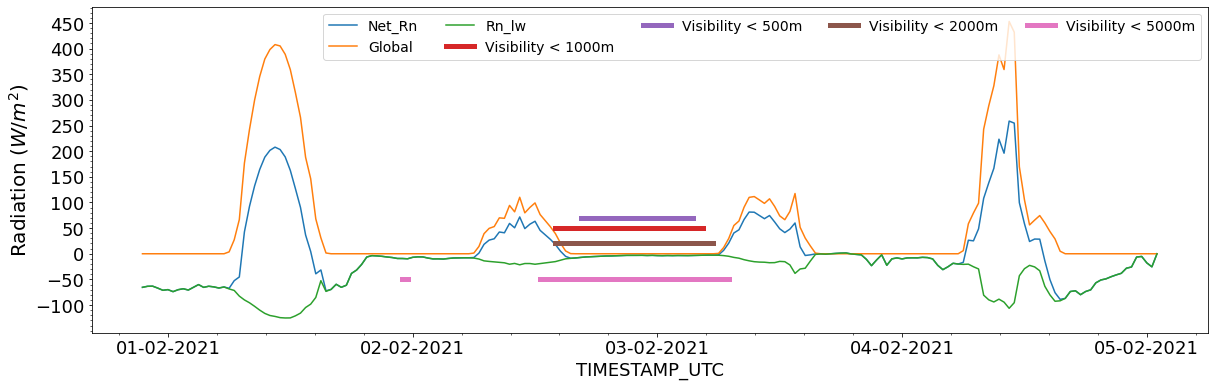

In [72]:
fig, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = (20,6)
params = {'mathtext.default': 'regular' }          
ax.plot(combined_rad['Net_rn'][1600:1800], label = 'Net_Rn')


ax.plot(combined_rad['global'][1600:1800], label = 'Global')
ax.plot(combined_rad['Rn_lw'][1600:1800], label = 'Rn_lw')
#
#
## visibility
#
#
ax.plot(combined_rad['Vis_1000'][1600:1800], linewidth=5, label = 'Visibility < 1000m')
ax.plot(combined_rad['Vis_500'][1600:1800], linewidth=5, label = 'Visibility < 500m')
ax.plot(combined_rad['Vis_2000'][1600:1800], linewidth=5, label = 'Visibility < 2000m')
ax.plot(combined_rad['Vis_5000'][1600:1800], linewidth=5, label = 'Visibility < 5000m')

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.tick_params(axis='x', labelrotation=0)

#ax.set_ylim([-150.0,450])
ax.set_yticks(np.arange(-100,500, 50.0))
ax.legend(loc= 'upper right', prop={'size': 14}, ncol = 5)
ax.set_xlabel('TIMESTAMP_UTC', fontsize=18)
ax.set_ylabel('Radiation ($W/m^2$)', fontsize=20)
##fig.set_size_inches(20, 6)
#fig.autofmt_xdate()
ax.minorticks_on()
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))


In [13]:
combined_rad.columns

Index(['index', 'time', 'V3', 'V4', 'V5', 'V6', 'global', 'reflex', 'Lupper',
       'Llower', 'Net_rn', 'time_utc', 'level_0', 'Time (CET)', 'index', 'T',
       'U', 'P', 'FS', 'FSD', 'R', 'V', 'SR', 'SREF', 'SAL', 'SSUL', 'ET10',
       'ET20', 'ET50', 'ET100', 'EU10', 'EU20', 'EU50', 'Rn_lw', 'Vis_1000',
       'Vis_2000', 'Vis_5000', 'Vis_500'],
      dtype='object')

In [14]:
net_rad_nov = pd.read_excel('/Volumes/Seagate Backup Plus Drive/data_exp1/energy budget.xlsm')

In [15]:
net_rad_nov = net_rad_nov.iloc[23:, :]

In [16]:
net_rad_nov.columns
net_rad_nov.tail()
net_rad_nov.head()

,TIMESTAMP,Global,Net_Sol,Net_infra,Net_rad,CR3000,5671
23,20/11/2020 18:50:00,0,0,-57.24,-57.24,-10.96,-11.83
24,20/11/2020 18:51:00,0,0,-56.32,-56.32,-11.06,-11.93
25,20/11/2020 18:52:00,0,0,-57.751,-57.751,-11.16,-12.05
26,20/11/2020 18:53:00,0,0,-58.093,-58.093,-11.26,-12.15
27,20/11/2020 18:54:00,0,0,-58.115,-58.115,-11.36,-12.27


In [17]:
times_nov = pd.date_range("2020-11-20 16:50:00","2020-12-02 13:26:00", freq= '1T')
times_nov.shape

(17077,)

In [18]:
net_rad_nov.shape

(17077, 7)

In [19]:
net_rad_nov['timeutc'] = times_nov

In [20]:
net_rad_nov['timeutc'] = pd.to_datetime(net_rad_nov['timeutc'])
net_rad_nov = net_rad_nov.resample('30min', closed = 'left', on = 'timeutc').mean()

/Applications/anaconda3/envs/ARUN/lib/python3.8/site-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


In [21]:
net_rad_nov = net_rad_nov.drop('timeutc', 1)

/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_36704/677673786.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  net_rad_nov = net_rad_nov.drop('timeutc', 1)


In [22]:
net_rad_nov.reset_index(inplace = True)

In [23]:
synop = pd.read_excel('/Users/varungandhi/Downloads/Budapest-44527-10-perces.xlsx')
synop = synop.rename(columns = {'idő (CET)':'Time (CET)'})
synop_nov = synop[(synop['Time (CET)'] >= '2020-11-20 16:50:00') & (synop['Time (CET)'] <= '2020-12-02 13:26:00')]
synop_nov = synop_nov.reset_index()
synop_nov['Time (CET)'] = pd.to_datetime(synop_nov['Time (CET)'])
synop_nov = synop_nov.resample('30min', on = 'Time (CET)', closed = 'left').mean()

In [24]:
synop_nov.reset_index(inplace = True)

In [25]:
synop_nov = synop_nov.iloc[6:, :]
synop_nov = synop_nov.reset_index()

In [26]:
combined_rad_nov = pd.concat([net_rad_nov, synop_nov], axis = 1)

In [27]:
combined_rad_nov = combined_rad_nov.set_index(combined_rad_nov['timeutc'])

In [28]:
def visibility(lower_value, upper_value,value):
    list_empty = []
    for i in range(len(combined_rad_nov['V'])):
        if combined_rad_nov['V'][i] >= lower_value and combined_rad_nov['V'][i] <= upper_value:
            list_empty.append(value)
        
        else:
            list_empty.append(float('NAN'))
            
    return list_empty

Vis_1000 = visibility( 0, 1000, 50)
Vis_500 = visibility( 0, 500, 70)
Vis_2000 = visibility( 0, 2000, 20)
Vis_5000 = visibility( 0, 5000, -50)
combined_rad_nov['Vis_1000'] = Vis_1000
combined_rad_nov['Vis_2000'] = Vis_2000
combined_rad_nov['Vis_5000'] = Vis_5000
combined_rad_nov['Vis_500'] = Vis_500

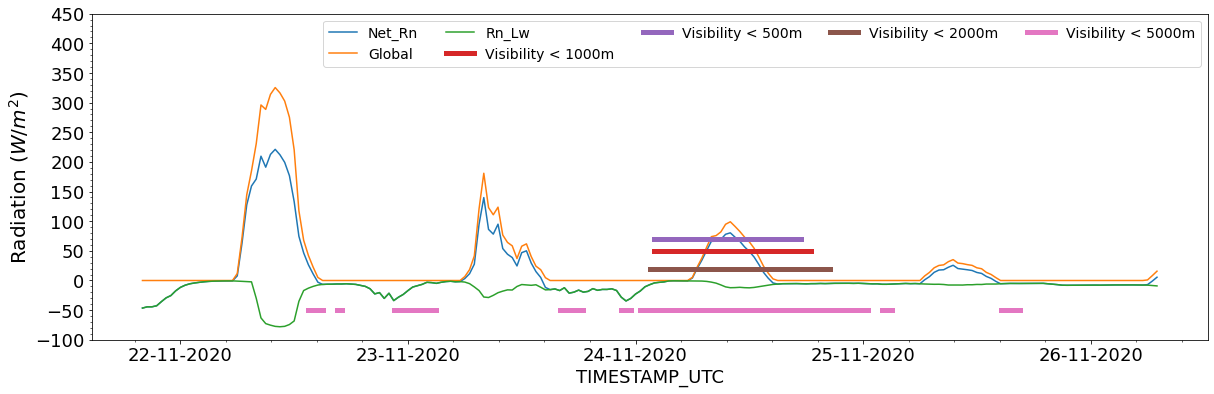

In [73]:
fig, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = (20,6)
params = {'mathtext.default': 'regular' }          
ax.plot(combined_rad_nov['Net_rad'][55:270], label = 'Net_Rn')
ax.plot(combined_rad_nov['Global'][55:270], label = 'Global')
ax.plot(combined_rad_nov['Net_infra'][55:270], label = 'Rn_Lw')

ax.plot(combined_rad_nov['Vis_1000'][55:270], linewidth=5, label = 'Visibility < 1000m')
ax.plot(combined_rad_nov['Vis_500'][55:270], linewidth=5, label = 'Visibility < 500m')
ax.plot(combined_rad_nov['Vis_2000'][55:270], linewidth=5, label = 'Visibility < 2000m')
ax.plot(combined_rad_nov['Vis_5000'][55:270], linewidth=5, label = 'Visibility < 5000m')
##
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.tick_params(axis='x', labelrotation=0)

#ax.set_ylim([-100,400])
ax.set_yticks(np.arange(-100,500, 50.0))
ax.legend(loc= 'upper right', prop={'size': 14}, ncol = 5)
ax.set_xlabel('TIMESTAMP_UTC', fontsize=18)
ax.set_ylabel('Radiation ($W/m^2$)', fontsize=20)

ax.minorticks_on()
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))

In [161]:
synop_nov.shape

(570, 19)

In [162]:
net_rad_nov.shape

(570, 8)

In [169]:
combined_rad_nov

,timeutc,Global,Net_Sol,Net_infra,Net_rad,CR3000,5671,"time,utc",Time (CET),index,...,SREF,SAL,SSUL,ET10,ET20,ET50,ET100,EU10,EU20,EU50
timeutc,,,,,,,,,,,,,,,,,,,,,
2020-11-20 16:30:00,2020-11-20 16:30:00,0.000000,0.000000,-57.992700,-57.992700,-11.403000,-12.321000,2020-11-20 16:30:00,2020-11-20 16:30:00,2836.0,...,0.000000,287.100000,336.600000,9.200000,9.600000,10.800000,12.000000,0.17,0.12,0.18
2020-11-20 17:00:00,2020-11-20 17:00:00,0.000000,0.000000,-38.569567,-38.569567,-13.135333,-14.255667,2020-11-20 17:00:00,2020-11-20 17:00:00,2838.0,...,0.000000,264.933333,332.533333,9.066667,9.600000,10.800000,12.033333,0.17,0.12,0.18
2020-11-20 17:30:00,2020-11-20 17:30:00,0.000000,0.000000,-49.806667,-49.806667,-14.947333,-16.337000,2020-11-20 17:30:00,2020-11-20 17:30:00,2841.0,...,0.000000,252.400000,328.066667,8.900000,9.500000,10.800000,12.033333,0.17,0.12,0.18
2020-11-20 18:00:00,2020-11-20 18:00:00,0.000000,0.000000,-50.758700,-50.758700,-16.039000,-17.549000,2020-11-20 18:00:00,2020-11-20 18:00:00,2844.0,...,0.000000,265.800000,328.633333,8.700000,9.433333,10.800000,12.000000,0.17,0.12,0.18
2020-11-20 18:30:00,2020-11-20 18:30:00,0.000000,0.000000,-38.151933,-38.151933,-17.066333,-18.659667,2020-11-20 18:30:00,2020-11-20 18:30:00,2847.0,...,0.000000,268.166667,328.733333,8.533333,9.333333,10.800000,12.000000,0.17,0.12,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02 11:00:00,2020-12-02 11:00:00,235.635400,216.055400,-59.082033,156.973367,-13.372000,-14.552667,2020-12-02 11:00:00,2020-12-02 11:00:00,4530.0,...,63.533333,246.266667,331.500000,1.900000,3.200000,7.200000,9.600000,0.16,0.11,0.17
2020-12-02 11:30:00,2020-12-02 11:30:00,277.329733,251.137733,-73.469267,177.668467,-12.215000,-13.786000,2020-12-02 11:30:00,2020-12-02 11:30:00,4533.0,...,42.566667,244.166667,328.766667,1.966667,3.166667,7.200000,9.600000,0.16,0.11,0.17
2020-12-02 12:00:00,2020-12-02 12:00:00,123.894587,112.968353,-68.317667,44.650687,-10.331333,-12.368333,2020-12-02 12:00:00,2020-12-02 12:00:00,4536.0,...,42.166667,250.133333,330.666667,2.133333,3.133333,7.200000,9.600000,0.16,0.11,0.17
